<a href="https://colab.research.google.com/github/xcharita/ineuron/blob/main/Machine_Learning_Practical_Assignment_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

Task: Deploy this assignment in any cloud platform.(Try to look for free cloud platform)

Assignment: Submit assignment’s deployable link only.


In [ ]:
import numpy as np 
import pandas as pd 
import scipy.stats as stats 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston() 
bos = pd.DataFrame(boston.data)

**If we look at the data directly from the dataset, we can get to know more about the datastructure of the dataset**

In [ ]:
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

**We see that there is a key called 'DESCR' , and let's take a look at it**

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**We see here also that these are all descriptions of the feature_names, which we will use as column names of the dataframe.**

In [ ]:
bos = pd.DataFrame(data=boston.data, columns = boston.feature_names)

In [ ]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


**The explanation of the columns can be found in the 'Description' , a few cells above**

**The dataset seems complete and also not having any null-values. All the features are numeric , so there is no need for any conversion from categorical data. The dataset is not so big (506 rows). But let's take a look at the data itself.**

In [ ]:
bos.head(9)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93


**In the description we could read that mostly column 'MEDV' is used as target. With this lineair regression it is important to have a target, otherwise we don't know against which data we can hold each row meaning what should be the ultimate housing price with the different features in mind. So now we can add 'MEDV' to the dataset as well since the target was provided as one of the keys in the dataset.**

In [ ]:
bos['MEDV'] = boston.target

In [ ]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


**Perfect. The dataframe seems complete now. Maybe we can look closely at the names of the columns and trhough visualization make a few assumptions as well. I found the columns 'DIS', 'AGE' and 'NOX' interesting to look into, but there are many more findings we can get from this dataset. I will use a correlation map to see if there are interesting causalities**

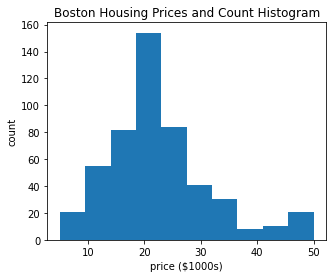

In [ ]:
plt.figure(figsize=(5, 4))
plt.hist(boston.target)
plt.title('Boston Housing Prices and Count Histogram')
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.show()

**Let's determine whether there is a statistically significant relationship between the variables, because correlations between variables, are crucial if we want to use the value of one variable to predict the value of another** 

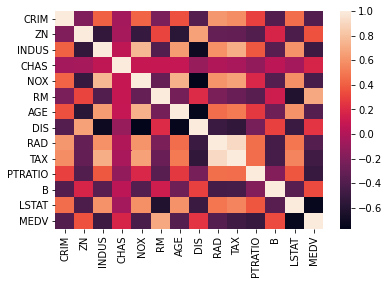

In [ ]:
corr_matrix = bos.corr()
sns.heatmap(data=corr_matrix)

**In this heatmap we can see the correlation between the columns. The lighter the color between the columns , the better correlation there is (1.0 is the max). I thought that 'AGE' and 'DIS' would be interesting, but the heatmap does not give enough correlation to say that there is a significant relation. Though the correlation with 'AGE' and 'NOX' seems better. Also a good correlation is between 'RAD' and 'TAX'. Maybe we can say that the more radial highways in the neighborhood the higher the property tax rate gets. But let's take a look at other correlations for use in the model. If 'MEDV' is our target, 'RM' would be a good key to take a closer look and use it for our model. Maybe we can check that with any visualization.**

Text(0, 0.5, 'Target Price in $1000')

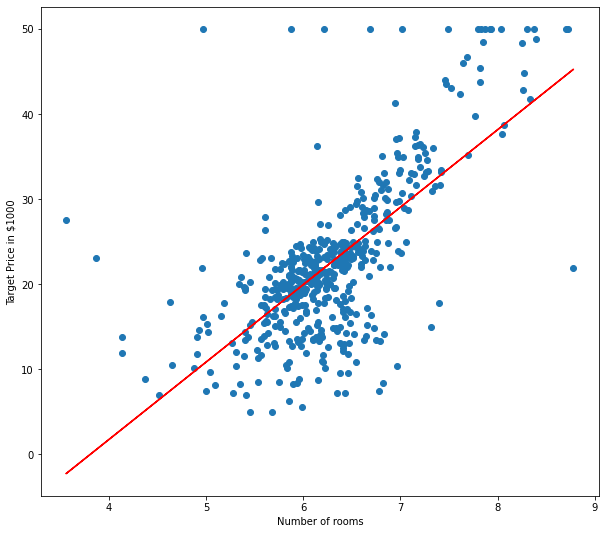

In [ ]:
plt.figure(figsize=(10, 9))
plt.scatter(bos.RM, bos.MEDV)

m, b = np.polyfit(bos.RM, bos.MEDV, 1)
plt.plot(bos.RM, m*bos.RM + b, color='red')

plt.xlabel('Number of rooms')
plt.ylabel('Target Price in $1000')

**We can maybe say that the more rooms in a property, the higher the price will be (which makes so much sense). Though we can see that there is an outlier, where the amount of rooms is close to 9 but the price seems to be lower than 30000. But in general, it is fair to say that we can use a lineair regression model, since the plot does suggest that.**

We can make the data ready now for training the model and then train it to a usable model. To train the model we should keep some data aside so we can test the actual trained model on test data. The usual ratio is 75-25, but you can choose anything around that range and it should make sense as well.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = pd.DataFrame(bos)
Y = bos['MEDV']

By using train_test_split, the method gives back 4 parameters: X_train, Y_train, X_test, Y_test. These can be used again to filter out the train and test data.

In [ ]:
X_train,  X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 2)

In [ ]:
X_train.shape, Y_train.shape

((404, 14), (404,))

Since we clearly could see that the relation between 'MEDV' and 'RM' was a nice increasing line, we might simply say that we can use linear regression for this model.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LR = LinearRegression()

In [ ]:
LR.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

There could be a reason to normalize the data, but currently i have not enough statistical knowledge to wisely choose for either. But the model has been fitted and it is good to get the response of the model. As soon as we have that, we can lay the predictor variables against the response variables to find out if we have a usuable model. This model needs to be evaluated for it's suitability.

In [ ]:
pred = LR.predict(X_train)

There are different ways to test how the model predicted. In general you want to determine how changes in predictor variables are associated with changes in the response variables (bos['MEDV']). But when we use regression to make predictions, our goal is to produce predictions that are both correct on average and close to the real values.

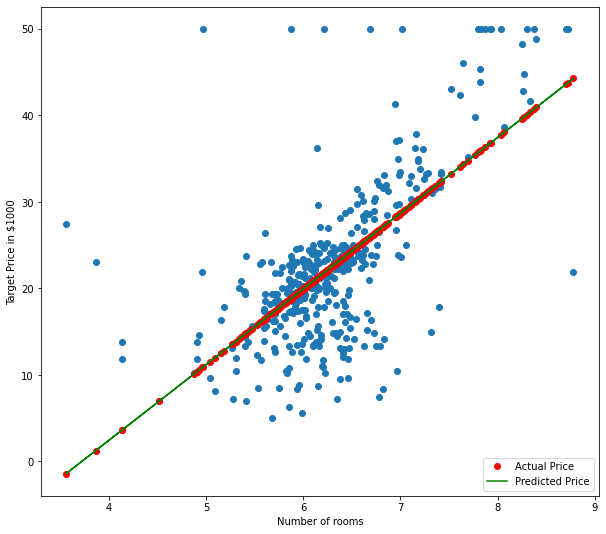

In [ ]:
plt.figure(figsize=(10, 9))
plt.scatter(X_train.RM, Y_train)

m, b = np.polyfit(X_train.RM, Y_train, 1)
plt.plot(X_train.RM, m*X_train.RM + b, 'ro', label='Actual Price')

slope, intercept = np.polyfit(X_train.RM, pred,1)
plt.plot(X_train.RM, slope*X_train.RM + intercept, color='green', label='Predicted Price')

plt.xlabel('Number of rooms')
plt.ylabel('Target Price in $1000')

plt.legend(loc='lower right')

When we look at the plot , it seems like the model can predict quite good. But we should try to compare the results in other ways as well. 

**The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences. It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.**

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# model evaluation for training set

y_train_predict = LR.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = LR.score(X_train, Y_train)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}%'.format(r2*100))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.3471653296913375e-14
R2 score is 100.0%




In [ ]:
# model evaluation for test set

y_test_predict = LR.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = LR.score(X_test, Y_test)

print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R2: {}%".format(r2*100))
print("\n")

The model performance for training set
--------------------------------------
Root Mean Squared Error: 4.231911628463879e-14
R2: 100.0%




For the training as well as the test data is the R2 the same: 100%

R-squared is a statistical measure of how close the data are to the fitted regression line. R-squared is always between 0 and 100%:

    0% indicates that the model explains none of the variability of the response data around its mean.
    100% indicates that the model explains all the variability of the response data around its mean.

In general, the higher the R-squared, the better the model fits your data.

So it seems like this is a good model, since it fits perfectly (100%) on the target and predictions as well!!